In [74]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading:

In [75]:
url='https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/hepatitis.csv'

In [76]:
df=pd.read_csv(url)

In [77]:
df.head(5 )

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


# 2. Data Preprocessing:

In [78]:
df.shape

(154, 20)

In [79]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [80]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [81]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col].fillna(df[col].mean(), inplace=True)

In [82]:
df.isnull().sum().sum()

0

In [83]:
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [84]:
df.HISTOLOGY.value_counts()

HISTOLOGY
1    84
2    70
Name: count, dtype: int64

In [85]:
df.isnull().sum().sum()

0

In [86]:
X=df.drop('Class',axis=1)

In [87]:
y=df[['Class']]

In [88]:
#1 indicates a positive case and 0 indicates a negative case.

# 3. Decision Tree Model:

In [89]:
from sklearn.model_selection import train_test_split

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=40)

In [152]:
xtrain.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
129,54,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,30.0,4.5,0.0,2
76,34,2,1.0,1,2,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.6,30.0,24.0,4.0,76.0,1
39,65,1,2.0,2,1,1,2,2.0,1.0,1.0,1.0,1.0,2.0,0.3,180.0,53.0,2.9,74.0,2
128,57,1,1.0,2,1,1,2,2.0,2.0,2.0,1.0,1.0,2.0,4.6,82.0,55.0,3.3,30.0,2
53,40,1,2.0,1,1,2,2,2.0,1.0,1.0,2.0,2.0,2.0,1.2,85.0,31.0,4.0,100.0,1


In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dtc=DecisionTreeClassifier()

In [155]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

# 4. Model Evaluation:

In [156]:
predict_ytest=dtc.predict(xtest)

In [157]:
predict_ytest

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [158]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay,classification_report,roc_auc_score
import numpy as np

In [159]:
precision_score(ytest,predict_ytest)

0.5384615384615384

In [160]:
recall_score(ytest,predict_ytest)

0.7

In [161]:
f1_score(ytest,predict_ytest)

0.608695652173913

In [162]:
confusion_matrix(ytest,predict_ytest )

array([[31,  6],
       [ 3,  7]], dtype=int64)

In [163]:
print(classification_report(ytest, dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.54      0.70      0.61        10

    accuracy                           0.81        47
   macro avg       0.73      0.77      0.74        47
weighted avg       0.83      0.81      0.82        47



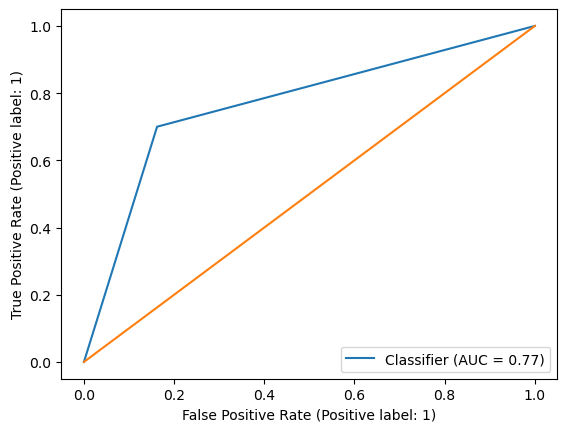

In [164]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_predictions(ytest,predict_ytest)
plt.plot([0,1],[0,1])

In [165]:
roc_auc_score(ytest,predict_ytest)


0.7689189189189188